In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data=load_digits()
# data.data.shape

In [3]:
# from sklearn.model_selection import train_test_split

In [4]:
# x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3)

In [5]:
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [6]:
# for i in x_train:
#     print(i)

In [7]:
# plt.imshow(x_test.reshape(-1, 8,8)[0],cmap=plt.cm.binary)

In [26]:
# -----------------------------------------code starts from here---------------------------------------------------------------
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [41]:
#Normalise

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [54]:
# define the sequential model
model = tf.keras.models.Sequential()
# input layer should be flattened
model.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) 
# Hiddent layer (128 neuron)
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#training

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2614 - acc: 0.9235
Epoch 2/3
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1066 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0713 - acc: 0.9778


In [55]:
val_loss,val_acu = model.evaluate(x_test,y_test)
print(val_loss,val_acu)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0870 - acc: 0.9736
0.08698351733158342 0.9736


In [56]:
model.save("my-first-model.model")

In [57]:
new_model = tf.keras.models.load_model("my-first-model.model")

In [58]:
x_test.shape

(10000, 28, 28)

In [59]:
predictions = new_model.predict([x_test])

In [60]:
print(predictions)

[[4.95139751e-09 5.19715249e-09 1.47162029e-06 ... 9.99986887e-01
  1.71776604e-09 1.04309834e-06]
 [3.27042127e-09 1.08587294e-04 9.99855280e-01 ... 6.15505091e-10
  9.27129378e-08 4.67501515e-12]
 [2.01290860e-07 9.99772370e-01 7.77147070e-05 ... 3.68302863e-05
  3.46369816e-05 2.83156010e-06]
 ...
 [1.42277828e-10 3.32662154e-07 5.78394470e-08 ... 3.01347445e-05
  2.86487847e-07 8.25405805e-05]
 [4.88990075e-08 7.47670157e-08 2.04547508e-08 ... 9.35878290e-08
  1.26919449e-05 6.67363498e-09]
 [1.43966281e-06 1.91404439e-07 5.13815667e-06 ... 4.28508695e-09
  1.07162384e-06 1.19917898e-08]]


In [61]:
print(np.argmax(predictions[3]))

0


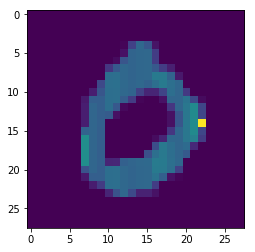

In [62]:
plt.imshow(x_test[3])